<a href="https://colab.research.google.com/github/ancebuc/Affirmations/blob/master/TrabajoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final de Inteligencia Artificial

Lo que tenemos que hacer para este trabajo es asignarle una Época a las fotos del museo de La Rioja que se van recibiendo. Claramente se trata de un ejecicio de Visión por computador.

Lo primero que vamos a hacer es importar algunas librerías que nos van a hacer falta a lo largo de las prácticas:

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
%matplotlib inline

Ahora, vamos y cargar el dataset de imágenes del museo de La Rioja que nos han proporcionado:

In [ ]:
!wget https://unirioja-my.sharepoint.com/:u:/g/personal/joheras_unirioja_es/EWyDMGupN_BBqw8KMLQfvXkBmaycNInw9c5SMjvRsjNhEA?download=1 -O museo.tar.gz

--2023-06-08 20:49:34--  https://unirioja-my.sharepoint.com/:u:/g/personal/joheras_unirioja_es/EWyDMGupN_BBqw8KMLQfvXkBmaycNInw9c5SMjvRsjNhEA?download=1
Resolving unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/joheras_unirioja_es/Documents/DatasetsIA/museo.tar.gz?ga=1 [following]
--2023-06-08 20:49:35--  https://unirioja-my.sharepoint.com/personal/joheras_unirioja_es/Documents/DatasetsIA/museo.tar.gz?ga=1
Reusing existing connection to unirioja-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1378339056 (1.3G) [application/x-gzip]
Saving to: ‘museo.tar.gz’

museo.tar.gz        100%[===================>]   1.28G  49.4MB/s    in 27s     

2023-06-08 20:50:02 (49.1 MB/s) - ‘museo.tar.gz’ saved [1378339056/1378339056]



In [ ]:
import tarfile
file = tarfile.open('museo.tar.gz')
file.extractall('./museo')
file.close()

Cuando descargamos las imágenes, aparecen todas juntas. No sabemos a qué epoca pertencen cada una. Para ello vamos a utilizar los metadatos que nos proporcionan. 

In [ ]:
import pandas as pd
metadatos = pd.read_excel("/content/MuseoDeLaRioja.xlsx")

Vamos a mostrar algunos de sus datos para saber qué nos ofrecen:

In [ ]:
metadatos.head(n=10)

,ID_NUM,IDENT,NUM_INVENTARIO,SECCION_CIENTIFICA,SERIE_CIENTIFICA,NOMBRE_COMUN,TITULO,EDAD,CULTURA,DATACION_INICIAL,...,TEMA,MARCAS,DIMENSIONES,PESO,PROVINCIA_PROCEDENCIA,MUNICIPIO_PROCEDENCIA,TERMINO_PROCEDENCIA,FECHA_PROCEDENCIA,DESCRIPCION,BIBLIOGRAFIA
0,4835,MUR-2009/00001-Imagen,12825,6,1.0,209,NaN,2.0,2.0,1.0,...,7.0,NaN,"Long. 0,16, anch. 0,12, grosor. 0,02",0.0,26.0,191.0,"VAR II. 1979. 1U, nº 35",1988-12-16 00:00:00,Fragmento de teja o ladrillo de forma rectangu...,"- GALVE IZQUIERDO, Mª Pilar: Excavaciones arqu..."
1,4836,MUR-2009/00002-Imagen,12826,6,6.0,209,NaN,NaN,2.0,1.0,...,NaN,NaN,"Diám. Abertura. 0,24",0.0,26.0,191.0,V||CHR(39)||90. sector i. b2,1996-01-25 00:00:00,"Fragmento de tegula lucernaria, que funcionaba...","- martinez clemente, jesús: vareia: la ciudad ..."
2,4839,MUR-2009/00005-Imagen,12894,10,1.0,446,NaN,NaN,2.0,1.0,...,NaN,NaN,"Long. 0,13, anch. máx. 0,03, grosor. 0,005",0.0,26.0,191.0,V||CHR(39)||89. Escombrera,1996-01-25 00:00:00,"Fragmento de reja de rastra de hierro, con for...","- ESPINOSA RUIZ, Urbano: Actividades artesanal..."
3,4840,MUR-2009/00006-Imagen,12901,10,4.0,457,NaN,NaN,2.0,1.0,...,7.0,NaN,"Long. 0,05, anch. 0,01, grosor. 0,003",0.0,26.0,191.0,V||CHR(39)||88. SECTOR I. 10D. Niv. 3,1988-12-28 00:00:00,"Fragmento de pasador de cerradura, formado por...","- ESPINOSA RUIZ, Urbano: Actividades artesanal..."
4,4844,MUR-2009/00010-Imagen,12920,10,4.0,32,Acus,2.0,2.0,1.0,...,NaN,NaN,"Long. 0,07, grosor. 0,001",0.0,26.0,191.0,"VAR IV. 1982. 4H, nivel a",1988-12-16 00:00:00,"Aguja de coser de bronce con ojo de 0,01. Pudo...","- GALVE IZQUIERDO, Mª Pilar: Excavaciones arqu..."
5,4845,MUR-2009/00011-Imagen,12923,10,4.0,204,Tipo Aucissa,NaN,2.0,1.0,...,NaN,NaN,"Long. 0,045, anch. 0,005",0.0,26.0,191.0,Sin referencia topográfica ni de campaña,1996-01-25 00:00:00,Fragmento de fíbula Aucissa o derivada,"- ERICE LACABE, Romana: Formas de vida cotidia..."
6,4846,MUR-2009/00012-Imagen,12924,10,4.0,204,Tipo Aucissa,NaN,2.0,1.0,...,NaN,NaN,"Long. 0,04, anch. 0,006-0,008",0.0,26.0,191.0,Sin referencia topográfica ni de campaña,1996-01-25 00:00:00,Fragmento de fíbula tipo Aucissa o derivada,"- ERICE LACABE, Romana: Formas de vida cotidia..."
7,4847,MUR-2009/00013-Imagen,12925,10,4.0,204,Tipo Aucissa,NaN,2.0,1.0,...,NaN,NaN,"Long. 0,045, anch. 0,007",0.0,26.0,191.0,Sin referencia topográfica ni de campaña,1996-01-25 00:00:00,Fragmento de fíbula del tipo de charnela (Auci...,"- ERICE LACABE, Romana: Formas de vida cotidia..."
8,4848,MUR-2009/00014-Imagen,12926,10,4.0,204,Tipo Alesia,NaN,2.0,1.0,...,NaN,NaN,"Long. 0,06, anch. 0,01",0.0,26.0,191.0,Sin referencia topográfica ni de campaña,1996-01-25 00:00:00,"Fragmento de fíbula de charnela, del tipo Ales...","- ERICE LACABE, Romana: Formas de vida cotidia..."
9,4850,MUR-2009/00016-Imagen,12933,10,4.0,24,NaN,2.0,2.0,1.0,...,NaN,NaN,"Diám. Ext. 0,008, orificio. 0,002, ancho. 0,005",0.0,26.0,191.0,VAR V. 10A. 1986,1988-12-16 00:00:00,"Cuenta de collar de bronce, de forma globular ...","- HERAS Y MARTINEZ, César Manuel: Objetos en e..."


Una cosa que se ha podido comprobar es que el identificador de los metadatos coinciden con el nombre de las fotografías.

Además, como nuestra tarea es que se indique a qué epoca pertence, nos interesa saber el periodo en el que está datado.
Para ello tenemos los campos de DATACION_INICIAL y DATACION_FINAL. Junto a ellos, tenemos la precisión de este dato.

In [ ]:
metadatos.PRECISION_INICIAL.unique()

array(['sdC', 'saC', 'dC', 'ca', 'sig', 'exa', 's', 'aC', nan, 'pos'],
      dtype=object)

Tras visualizar los datos, nos damos cuenta de:
*   sdC: siglos después de Cristo
*   saC: siglos antes de Cristo
*   dC: años después de Cristo
*   aC: años antes de Cristo
*   ca: se refiere a años
*   pos: se refiere a años
*   sig: siglo
*   s: siglo
*   exa: año exacto
*   nan: es que no tiene y por tanto no se tendrá en cuenta

A pesar de tener el campo Edad, no se sabe muy bien a qué se refiere:

In [ ]:
metadatos.EDAD.unique()

array([ 2., nan,  7.,  5.,  4.,  3.,  1.])

Además, hay bastantes obras que no tienen este campo, pero sí la datación que hemos mencionado anteriormente.

Lo primero que vamos a hacer es una función que dadas dos dataciones junto con su precisión nos indique a qué época pertenecen

Primero vamos a declarar las épocas

In [ ]:
epocas = ['Prehistoria', 'Edad Antigua', 'Edad Media', 'Edad Moderna', 'Edad Contemporánea']

Las fechas que vamos a tener en cuenta son
*   Prehistoria: hasta 3500 a.C
*   Edad Antigua: de 3500 a.C a 476 d.C
*   Edad Media: de 476 d.C hasta 1492 d.C
*   Edad Moderna: de 1492 d.C hasta 1789 d.C
*   Edad Contemporánea: desde 1789 d.C

In [ ]:
len(metadatos)

3182

In [ ]:
def epocaHistorica(di, pi):
  # Si no tiene datacion inicial, no se tiene en cuenta
  if(di == 'nan' or pi == 'nan'):
    return 0
  else:
    # Antes de Cristo
    if(pi == 'saC'):
      if(di > 35):
        return epocas[0]
      else:
        return epocas[1]
    elif(pi == 'aC'):
      if(di > 3500):
        return epocas[0]
      else:
        return epocas[1]
    # Después de Cristo
    elif(pi == 'sdC' or pi == 's' or pi == 'sig'):
      if(di <= 5):
        return epocas[1]
      elif(di > 5 and di <= 15):
        return epocas[2]
      elif(di > 15 and di <= 18):
        return epocas[3]
      else:
        return epocas[4]
    else:
      if(di <= 476):
        return epocas[1]
      elif(di > 476 and di <= 1492):
        return epocas[2]
      elif(di > 1492 and di <= 1789):
        return epocas[3]
      else:
        return epocas[4]


Vamos a probarlo con el primer registro:

In [ ]:
epocaHistorica(metadatos.DATACION_INICIAL[0], metadatos.PRECISION_INICIAL[0])

'Edad Antigua'

In [ ]:
epocaHistorica(metadatos.DATACION_INICIAL[50], metadatos.PRECISION_INICIAL[50])

'Edad Contemporánea'

Después lo que tenemos que hacer es modificar el directorio de las imágenes. Debemos tener en cuenta que no todas las imágenes aparecen en los metadatos. Por ello, lo primero que debemos hacer es diferenciarlas.

Para ello creamos un vector con los identificadores que aparecen en los metadatos

In [ ]:
ids = metadatos.ID_NUM
ids

0         4835
1         4836
2         4839
3         4840
4         4844
         ...  
3177     45471
3178     45473
3179    474008
3180    474009
3181    474010
Name: ID_NUM, Length: 3182, dtype: int64

Lo que vamos a hacer es dividir las fotos en carpetas.

In [ ]:
!pip install fastai -Uq

In [ ]:
from fastai.vision.all import *
import os
import shutil
from google.colab import files

Lo primero que vamos a hacer es dividir las imágenes en dos carpetas: 
*   aparecen: en esta carpeta estarán las imágenes de las cuales tenemos metadatos
*   noAparecen: son las que no tenemos datos con lo cual no sabemos a qué época pertenecen

In [ ]:
path = Path('data')
(path/'aparecen').mkdir(parents=True,exist_ok=True)
(path/'noAparecen').mkdir(parents=True,exist_ok=True)

In [ ]:
imagenes = '/content/museo/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/'
dirimg = os.listdir(imagenes)
for directorio in dirimg:
  archivos = os.listdir(imagenes + directorio)
  for archivo in archivos:
    archivocut = archivo[:-4]
    if archivocut in [str(i) for i in ids]:
      print('Está')
      shutil.copy(imagenes + directorio + '/' + archivo, path/('aparecen/'+ archivo))
    else:
      shutil.move(imagenes + directorio + '/' + archivo, path/('noAparecen/'+ archivo))

Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está
Está


In [ ]:
len(os.listdir('/content/data/aparecen'))

747

In [ ]:
idsfotos = [int(l[:-4]) for l in os.listdir('/content/data/aparecen')]

In [ ]:
len(os.listdir('/content/data/noAparecen'))

990

Como podemos observar, tenemos más fotos sin metadatos. Pero aún así, 747 es un número considerable para poder entrenar el modelo.

Ahora que hemos separado los datos, vamos a repartirlos por épocas históricas:

Eliminarmos el directorio del museo, que es la carpeta inicial que nos hemos descargado:

In [ ]:
shutil.rmtree('museo')

Creamos las nuevas rutas:

In [ ]:
(path/'Prehistoria').mkdir(parents=True,exist_ok=True)
(path/'Edad Antigua').mkdir(parents=True,exist_ok=True)
(path/'Edad Media').mkdir(parents=True,exist_ok=True)
(path/'Edad Moderna').mkdir(parents=True,exist_ok=True)
(path/'Edad Contemporánea').mkdir(parents=True,exist_ok=True)

In [ ]:
a = metadatos[metadatos.ID_NUM == int('9219')]
epocaHistorica(a.DATACION_INICIAL.values[0], a.PRECISION_INICIAL.values[0])

'Edad Antigua'

Y repartimos los datos en sus correspondientes variables:

In [ ]:
aparecen = os.listdir('/content/data/aparecen')
for foto in aparecen:
  nombre = foto[:-4]
  print(nombre)
  elementodf = metadatos[metadatos.ID_NUM == int(nombre)]
  epoca = epocaHistorica(elementodf.DATACION_INICIAL.values[0], elementodf.PRECISION_INICIAL.values[0])
  print(epoca)
  shutil.move(path/('aparecen/'+ foto), path/epoca/foto)

43799
Edad Contemporánea
9199
Edad Antigua
9734
Edad Contemporánea
5662
Edad Contemporánea
5677
Edad Contemporánea
9755
Edad Contemporánea
5260
Edad Moderna
8509
Edad Media
6784
Edad Contemporánea
7544
Edad Contemporánea
4936
Edad Contemporánea
43881
Edad Contemporánea
8012
Edad Contemporánea
6767
Edad Contemporánea
9111
Edad Antigua
5263
Edad Contemporánea
9710
Edad Contemporánea
31204
Edad Contemporánea
9862
Edad Contemporánea
7470
Edad Contemporánea
5352
Edad Contemporánea
6582
Edad Antigua
7764
Edad Contemporánea
8524
Edad Moderna
7433
Edad Contemporánea
6956
Edad Media
7990
Edad Contemporánea
8814
Edad Moderna
474008
Edad Contemporánea
9754
Edad Contemporánea
43876
Edad Contemporánea
43827
Edad Moderna
9142
Edad Moderna
31194
Edad Contemporánea
6803
Edad Contemporánea
9875
Edad Contemporánea
38991
Edad Contemporánea
43976
Edad Contemporánea
11717
Edad Contemporánea
8795
Edad Moderna
11716
Edad Contemporánea
5607
Edad Moderna
6078
Edad Antigua
9866
Edad Contemporánea
5143
Edad Medi

Ahora vamos a comprobar el número de fotos que tenemos de cada época histórica:

In [ ]:
len(os.listdir('/content/data/Prehistoria'))

11

In [ ]:
len(os.listdir('/content/data/Edad Antigua'))

64

In [ ]:
len(os.listdir('/content/data/Edad Media'))

41

In [ ]:
len(os.listdir('/content/data/Edad Moderna'))

108

In [ ]:
len(os.listdir('/content/data/Edad Contemporánea'))

523

Como vemos, el dataset está bastante sesgado, ya que los datos no son equitativos. Esto va producir que el modelo funcione bastante bien con elementos de la edad contemporánea, pero para el resto el rendimiento será bastante malo.

Ahora, vamos a partir los datos en el conjunto de entrenamiento y test:

Para ello creamos los directorios:

In [ ]:
(path/'train/prehistoria').mkdir(parents=True,exist_ok=True)
(path/'train/edadantigua').mkdir(parents=True,exist_ok=True)
(path/'train/edadmedia').mkdir(parents=True,exist_ok=True)
(path/'train/edadmoderna').mkdir(parents=True,exist_ok=True)
(path/'train/edadcontemporanea').mkdir(parents=True,exist_ok=True)

(path/'test/prehistoria').mkdir(parents=True,exist_ok=True)
(path/'test/edadantigua').mkdir(parents=True,exist_ok=True)
(path/'test/edadmedia').mkdir(parents=True,exist_ok=True)
(path/'test/edadmoderna').mkdir(parents=True,exist_ok=True)
(path/'test/edadcontemporanea').mkdir(parents=True,exist_ok=True)

In [ ]:
from sklearn.model_selection import train_test_split

Hacemos el reparto de datos:

In [ ]:
trainprehistoria, testprehistoria = train_test_split(get_image_files(path/'Prehistoria'),test_size=0.2,random_state=15)
trainedadantigua, testedadantigua = train_test_split(get_image_files(path/'Edad Antigua'),test_size=0.2,random_state=15)
trainedadmedia, testedadmedia = train_test_split(get_image_files(path/'Edad Media'),test_size=0.2,random_state=15)
trainedadmoderna, testedadmoderna = train_test_split(get_image_files(path/'Edad Moderna'),test_size=0.2,random_state=15)
trainedadcontemporanea, testedadcontemporanea = train_test_split(get_image_files(path/'Edad Contemporánea'),test_size=0.2,random_state=15)

Y movemos las imágenes a sus respectivas carpetas:

In [ ]:
for x in trainprehistoria:
  shutil.move(str(x),path/('train/prehistoria/'+x.name))

for x in trainedadantigua:
  shutil.move(str(x),path/('train/edadantigua/'+x.name))

for x in trainedadmedia:
  shutil.move(str(x),path/('train/edadmedia/'+x.name))

for x in trainedadmoderna:
  shutil.move(str(x),path/('train/edadmoderna/'+x.name))

for x in trainedadcontemporanea:
  shutil.move(str(x),path/('train/edadcontemporanea/'+x.name))

for x in testprehistoria:
  shutil.move(str(x),path/('test/prehistoria/'+x.name))

for x in testedadantigua:
  shutil.move(str(x),path/('test/edadantigua/'+x.name))

for x in testedadmedia:
  shutil.move(str(x),path/('test/edadmedia/'+x.name))

for x in testedadmoderna:
  shutil.move(str(x),path/('test/edadmoderna/'+x.name))

for x in testedadcontemporanea:
  shutil.move(str(x),path/('test/edadcontemporanea/'+x.name))

Y eliminamos los directorios previos:

In [ ]:
shutil.rmtree(path/'Prehistoria')
shutil.rmtree(path/'Edad Antigua')
shutil.rmtree(path/'Edad Media')
shutil.rmtree(path/'Edad Moderna')
shutil.rmtree(path/'Edad Contemporánea')

Una vez que hemos procesado las imágenes y las hemos repartido en sus respectivas carpetas, vamos a comenzar.

Lo primero que vamos a hacer es construir un objeto ``` DataBlock ```:

In [ ]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

Después, creamos nuestro `DataLoader` a partir del objeto anterior.

In [ ]:
trainPath = Path('data/train')

In [ ]:
dls = db.dataloaders(trainPath,bs=128)

Al mostrar un batch, podemos comprobar que el reparto no es para nada igualitario, ya que no tenemos de todas las épocas y además la mayoría de imágenes son de la edad contemporánea.

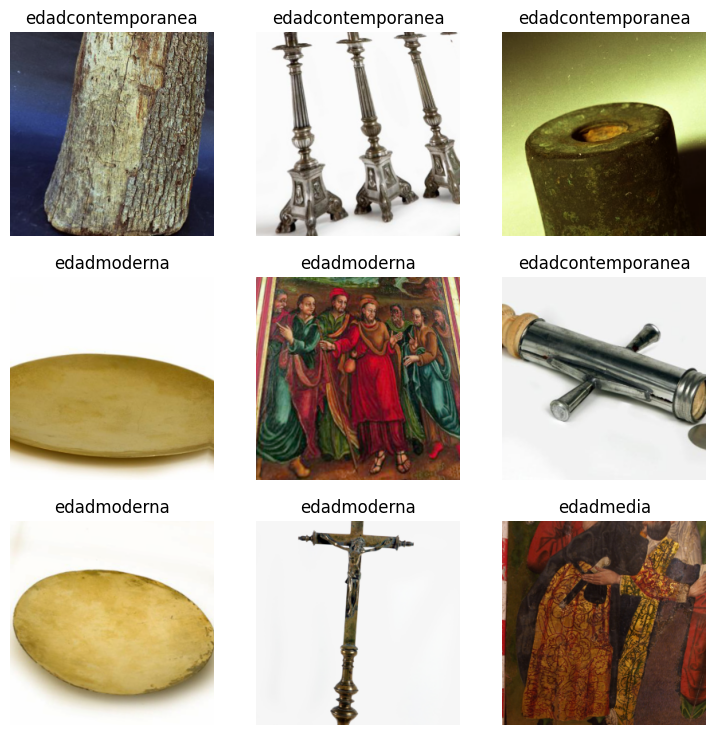

In [ ]:
dls.show_batch()

Creamos el modelo de predicción:

In [ ]:
learn = vision_learner(dls,resnet18,metrics=accuracy).to_fp16()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 50.7MB/s]


Y entrenamos la red:

In [ ]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.644830,1.985640,0.361345,00:21


epoch,train_loss,valid_loss,accuracy,time
0,2.419347,1.818165,0.336134,00:19
1,2.334784,1.712596,0.336134,00:19
2,2.223691,1.504357,0.478992,00:21
3,2.126297,1.374208,0.546219,00:19
4,2.027054,1.318133,0.554622,00:20
5,1.930558,1.253386,0.596639,00:19
6,1.809621,1.203484,0.596639,00:21
7,1.743204,1.164240,0.613445,00:19
8,1.684137,1.143113,0.647059,00:20
9,1.619186,1.124958,0.638655,00:18


Como vemos, a partir de la sexta época, la precición ya no avanza. La precisión que se consigue es de un 60%. Más adelante veremos si podemos mejorar esta precisión de alguna manera

Y después exportamos el modelo que hemos creado:

In [ ]:
learn.export()

Ahora vamos a interpretar los resultados que hemos obtenido:

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

Para ello vamos a utilizar una matriz de confusión:

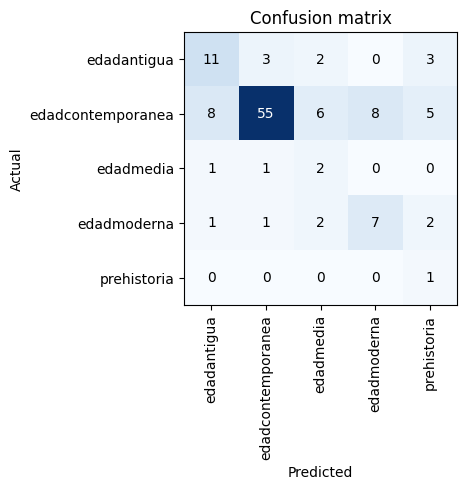

In [ ]:
interp.plot_confusion_matrix()

Los elementos de la diagonal son los que ha conseguido acertar. Aunque el valor para la edad contemporánea es bastante alto, digamos que también hay valores bastante dispersos. Además, como hemos mencionado antes, para la edad media y la prehistoria tenemos muy pocos valores. 

A continuación vamos a evaluar nuestro modelo, para ello creamos otro `DataBlock`.

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

(#2) [1.8720189332962036,0.5]

El primer valor que nos aparece es el valor de la función de pérdida, que es muy alto. El segundo es el valor de precisión para el conjunto de test, el cual, es bastante bajo como cabía esperar tras ver las predicciones.

Aunque mostremos las imágenes en las que mayores pérdidas se producen, tampoco sabríamos diferenciar a simple vista a qué época pertenecen.

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner

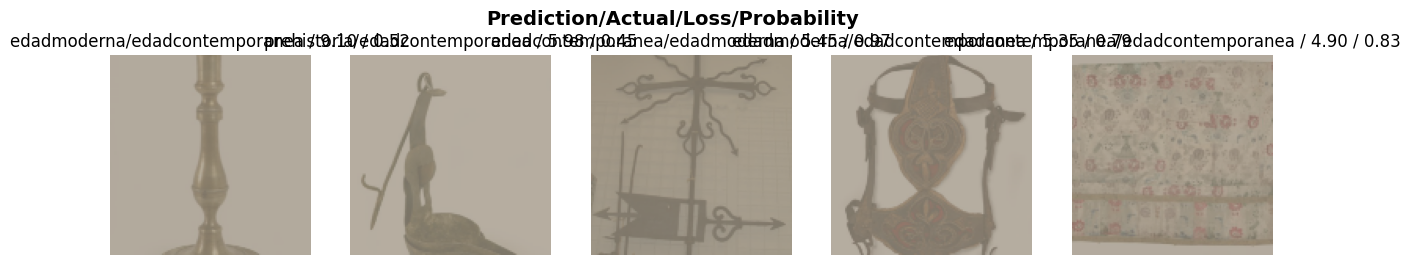

In [ ]:
interp.plot_top_losses(5,nrows=1)

Para poder probar nuestro modelo, vamos a crear una aplicación en HuggingFace:

Primero descargamos la librería:

In [ ]:
!pip install huggingface_hub["fastai"] -Uq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 5.1 MB/s eta 0:00:00


Nos autenticamos con el token de escritura que hemos creado para los entregables 2 y 3 de la asignatura:

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Y subimos el modelo dentro a la plataforma.

In [ ]:
from huggingface_hub import push_to_hub_fastai

repo_id = "ancebuc/museodelarioja"

push_to_hub_fastai(learner=learn, repo_id=repo_id)

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

model.pkl:   0%|          | 0.00/47.0M [00:00<?, ?B/s]

'https://huggingface.co/ancebuc/museodelarioja/tree/main/'

El enlace desde el cual podemos acceder al modelo es el siguiente: https://huggingface.co/spaces/ancebuc/MuseoDeLaRioja

## Ampliaciones

Uno de los aspectos que ayuda a que el modelo tenga una mejor precisión es elegir el learning rate correcto. Para ello tenemos una función que te elige el Leaning Rate `lr_find()`.

SuggestedLRs(valley=0.00010964782268274575)

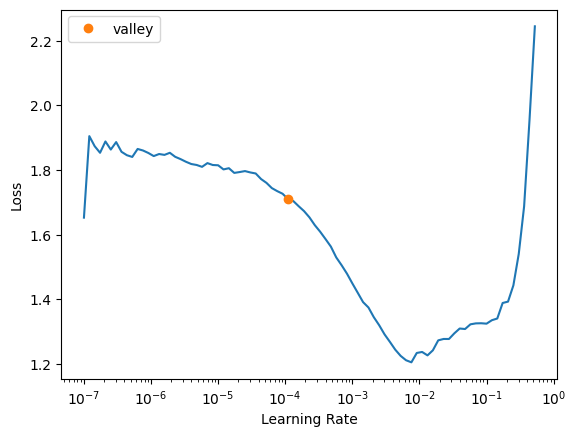

In [ ]:
learn.lr_find()

Vemos que el learning rate es el mismo que está puesto. 

Otra apliación que vamos a hacer es entrenar otros dos modelos para ver si la precisión mejora o empeora. El que hemos utilizado hasta ahora ha sido resnet18. Vamos a utilizar resnet34 y alexnet.

Declaramos los modelos:

In [ ]:
learn2 = vision_learner(dls,resnet34,metrics=accuracy).to_fp16()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 47.1MB/s]


In [ ]:
learn3 = vision_learner(dls,alexnet,metrics=accuracy).to_fp16()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 174MB/s]


Y a continuación realizamos el entrenamiento:

**Resnet 34:**

In [ ]:
learn2.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.773839,2.047214,0.344538,00:19


epoch,train_loss,valid_loss,accuracy,time
0,2.430407,1.896664,0.277311,00:18
1,2.429699,1.793747,0.344538,00:17
2,2.291752,1.647249,0.403361,00:19
3,2.208301,1.554151,0.462185,00:18
4,2.086952,1.456300,0.512605,00:21
5,1.971696,1.385925,0.537815,00:17
6,1.864242,1.333000,0.579832,00:18
7,1.764229,1.293664,0.605042,00:17
8,1.686202,1.261969,0.596639,00:17
9,1.624705,1.240344,0.596639,00:18


Vamos a ver si se puede encontrar un mejor learning rate

SuggestedLRs(valley=9.120108734350652e-05)

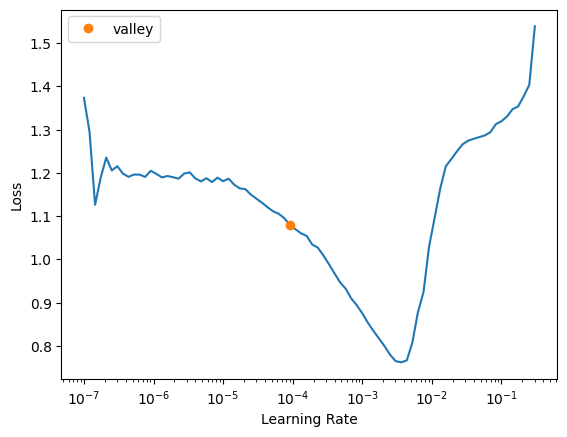

In [ ]:
learn2.lr_find()

In [ ]:
learn2.fine_tune(10,base_lr=9e-05)

epoch,train_loss,valid_loss,accuracy,time
0,1.091017,1.239809,0.596639,00:17


epoch,train_loss,valid_loss,accuracy,time
0,1.248951,1.248954,0.588235,00:18
1,1.265103,1.237415,0.596639,00:17
2,1.169310,1.219308,0.596639,00:17
3,1.192027,1.218049,0.605042,00:18
4,1.167652,1.198694,0.596639,00:18
5,1.157622,1.175512,0.621849,00:17
6,1.155869,1.171355,0.630252,00:17
7,1.135774,1.172992,0.630252,00:18
8,1.120709,1.160027,0.638655,00:16
9,1.109050,1.150114,0.638655,00:17


Aunque ha mejorado un poco con el cambio del learning rate, los resultados son casi iguales a los del primero modelo. Además, tarda bastante más en entrenarse

**Alexnet:**

In [ ]:
learn3.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.907131,1.533967,0.428571,00:17


epoch,train_loss,valid_loss,accuracy,time
0,2.596695,1.438606,0.394958,00:16
1,2.626730,1.430244,0.403361,00:16
2,2.533896,1.399313,0.445378,00:16
3,2.435115,1.359352,0.462185,00:16
4,2.341457,1.332332,0.512605,00:16
5,2.245177,1.285837,0.546219,00:16
6,2.185896,1.270011,0.554622,00:17
7,2.117063,1.251760,0.571429,00:16
8,2.063794,1.249753,0.579832,00:17
9,2.015098,1.255712,0.579832,00:16


SuggestedLRs(valley=0.0003981071640737355)

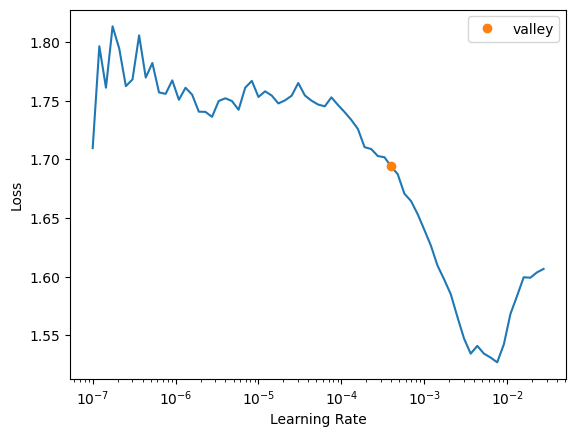

In [ ]:
learn3.lr_find()

Vamos a ver los resultados de los modelos entrenados con 

In [ ]:
learn2.dls = dlsTest
learn3.dls = dlsTest     

In [ ]:
learn.validate()

(#2) [1.8720189332962036,0.5]

In [ ]:
learn2.validate()


(#2) [1.5328832864761353,0.5131579041481018]

In [ ]:
learn3.validate()

(#2) [1.233944296836853,0.5789473652839661]

A pesar de que la precisión durante el entrenamiento parecía más baja, el que mejor precisión tiene con los datos de test es el último.

Otra ampliación que vamos a hacer es añadir fotos para una de las categorías para ver si mejoran las predicciones:

Primero descargamos un par de imágenes similares:

In [ ]:
path = Path('data/train/prehistoria')
file = 'prehistoria.txt'
download_images(path,path/file)

Y ahora volvemos a entrenar el modelo:

In [ ]:
dls = db.dataloaders(trainPath,bs=128)

In [ ]:
learn = vision_learner(dls,resnet18,metrics=accuracy).to_fp16()

In [ ]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.863155,1.429935,0.590164,00:17


epoch,train_loss,valid_loss,accuracy,time
0,2.402186,1.284246,0.557377,00:18
1,2.303980,1.276724,0.508197,00:17
2,2.221795,1.326695,0.483607,00:18
3,2.148664,1.389510,0.491803,00:18
4,2.021725,1.330990,0.581967,00:18
5,1.895969,1.245746,0.598361,00:18
6,1.796186,1.201357,0.614754,00:18
7,1.696347,1.199323,0.614754,00:18
8,1.638058,1.204668,0.606557,00:17
9,1.575596,1.214548,0.606557,00:18


In [ ]:
learn.validate()

(#2) [1.2145479917526245,0.6065573692321777]

Vemos que ha mejorado en un 10%. Para ver que ahora acierta los valores de la prehistoria, vamos a mostrar la matriz de confusión;

A continuación vamos a sacar las descripciones para clasificar las imágenes en varias categorías. Como en los metadatos no tenemos esa información, la tenemos que sacar de alguna parte. 

Primero vamos a rescatar los registros de las fotos que tenemos:

In [ ]:
fotoswtdesc = metadatos[metadatos['ID_NUM'].isin(idsfotos)] 

Y guardar las descripciones en una lista:

In [ ]:
descripciones = [l for l in fotoswtdesc.DESCRIPCION if str(l) != 'None' and str(l) != 'nan']
descripciones

['Fragmento de pared y base de botella cuadrada de vidrio Isings 50 con restos de sello del fabricante. Tiene decoración a molde en la base, con sello del cual se conserva un círculo que inscribe una roseta tripétala, entre cuyos pétalos hay letras mayúsculas M y T, con la transcripción M (anu) T (iti): fabricado por Tito. Fuera del círculo quedan restos de dos bolas en las esquinas',
 'Baldosa casi completa de planta rectangular y perfil trapezoidal, con reborde recto en los extremos cortos y biselado en los largos. El grosor es de 0,03. Presenta en la cara superior una retícula geométrica de sujección formada por cinco líneas paralelas a los lados cortos y una aspa de brazos largos que se superpone',
 'Fragmento de ladrillo para crear una cámara de aire entre la pared y el paramento',
 'Fragmento de moldura de mármol en semicírculo o media caña, del tipo baquetón o rodapié',
 'Pequeño estuche de madera de forma triangular y vaciado en su interior como un zueco, para meter los dedos d

He intentado categorizar los elementos en varios tipos: Pintura, decoración, construcción, herramienta, vajilla. Sin embargo, no he encontrado ningún modelo de procesamiento de lenguaje natural de HuggingFace que trate obras de arte. En el caso de que sí que hubiera encontrado uno, lo que habría hecho sería utilizar un modelo de PLN para traducirlo al inglés, ya que los modelos en castellano presentan peores resultados. Tras la traducción, se mostraría la etiqueta correspondiente.